# Homework Assignment #5 (Individual)


### <p style="text-align: right;"> &#9989; Jeremy Barnby</p>
### <p style="text-align: right;"> &#9989; barnbyje</p>

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate Logistic Regression models
* Build, fit, and evaluate Perceptron models
* Use PCA to reduce the number of features
* Build, fit, and evaluate an SVC model on PCA-transformed data
* Systematically investigate the effects of the number of PCA components on an SVC model of data

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **41 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due at 11:59 pm on Friday, April 15th**. It should be uploaded into the "Homework Assignments" submission folder for Homework #5. Submission instructions can be found at the end of the notebook.. 


---
## Part 1: Add to your Git repository to track your progress on your assignment (4 points)

For this assignment, you're going to add it to the `cmse202-s22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s22-turnin` repository and create a new directory called `hw-05`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s22-turnin`" repository inside the `hw-05` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

git clone https://github.com/barnbyje/cmse202-s22-turnin/tree/main/hw-05

&#9989; **Do this**: Before you move on, create a new branch called `hw05_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

git checkout -b hw05_branch


&#9989; **Do this**: Import necessary packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import statsmodels.api as sm

---
<a id="loading"></a>
## Part 2. Logistic Regression (12 points)
### 2.1 Data processing (5 points)
For this part, you will read and process the dataset `hw5_data.csv` and split the training and testing sets.

The provided data corresponds to a molecular biology dataset, where each row represents a patient classified into either "active" or "repressive". The columns represent features, where each feature comes from the quantification of a specific gene. Ten genes (ten features) are measured. The goal is to make predictive models that can classify patients ("active" or "repressive") based on the ten features.

The dataset is located at:
`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S22-data/main/data/hw5_data.csv`


**&#9989; Question 2.1.1 (1 point):** Read the `hw5_data.csv` file into your notebook and print out the unique labels in the `label` columns. 

Note: each row represents one data point and each column (except the `label` column) represents one feature. The `label` column corresponds to the class labels for every data point. There are two types of unique class labels in the `label` column. 

In [40]:
# Put your code here
genes = pd.read_csv('hw5_data.csv')
print(np.unique(genes['label']))

['active' 'repressive']


**&#9989; Question 2.1.2 (1 point):** To simplify the process of data modeling, we should convert the labels from strings to integers.

Replace all of the strings in your `label` column with integers based on the following:

| original label | integer label |
| -------- | -------- |
| repressive | 0 |
| active | 1 |

Once you've replaced the labels, display your DataFrame and confirm that it looks correct.

In [41]:
# Put your code here
genes['label'] = genes['label'].replace('repressive',0)
genes['label'] = genes['label'].replace('active',1)
genes

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1,0.000168,1.089799,3.706677,1.839418,1.000414,0.751246,-0.077189,0.949589,1.641961,1.102132
1,1,0.355099,0.000000,2.247742,NaN,0.000000,0.194369,0.116891,-0.059497,1.086607,0.508670
2,1,0.001236,0.000000,NaN,0.814211,2.696122,0.221476,0.229138,-0.173686,1.091221,1.048915
3,1,0.690140,0.000000,0.687331,0.000000,0.527291,0.185705,-0.089479,-0.379929,-0.093369,0.272125
4,1,1.376770,0.631267,2.090756,1.581667,0.793976,0.846570,0.178551,0.245401,1.221811,0.111456
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.539002,0.499277,0.000000,1.934047,0.000000,0.750042,0.605361,0.436925,1.426063,0.540208
996,0,0.004665,0.356522,0.000000,1.646765,0.198733,0.605987,0.306014,0.437594,1.220802,0.908293
997,0,0.368634,2.356287,1.937731,0.684271,1.801650,1.492007,0.463434,1.313578,0.908521,0.958253
998,0,0.000000,1.668051,0.000000,1.213437,0.403462,1.526797,0.274236,1.283074,0.795663,0.757853


**&#9989; Question 2.1.3 (1 point):** At this point, you've hopefully noticed that some of the rows seems to have missing data values as indicated by the existence of `NaN` values. Since we don't necessarily know what to replace these values with, let's just play it safe and remove all of the rows that have `NaN` in any of the column entries. This should help to ensure that we don't end up with errors or confusing results when we try to classify the data.

Remove all of the rows that contain a `NaN` in any column. **Make sure you actually store this new version of your dataframe either in the original variable name or in a new variable name**. If everything went as intended, you should find that you have 793 rows left over.

In [42]:
# Put your code here 
genes = genes.dropna(axis = 0)
genes

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,1,0.000168,1.089799,3.706677,1.839418,1.000414,0.751246,-0.077189,0.949589,1.641961,1.102132
3,1,0.690140,0.000000,0.687331,0.000000,0.527291,0.185705,-0.089479,-0.379929,-0.093369,0.272125
4,1,1.376770,0.631267,2.090756,1.581667,0.793976,0.846570,0.178551,0.245401,1.221811,0.111456
6,1,0.407187,0.590095,0.063048,0.559918,0.370942,0.084975,0.486121,0.207094,0.660959,0.326050
8,1,1.238114,1.268546,1.515984,1.174424,0.520594,1.222930,0.268151,0.983738,0.952295,0.460386
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.539002,0.499277,0.000000,1.934047,0.000000,0.750042,0.605361,0.436925,1.426063,0.540208
996,0,0.004665,0.356522,0.000000,1.646765,0.198733,0.605987,0.306014,0.437594,1.220802,0.908293
997,0,0.368634,2.356287,1.937731,0.684271,1.801650,1.492007,0.463434,1.313578,0.908521,0.958253
998,0,0.000000,1.668051,0.000000,1.213437,0.403462,1.526797,0.274236,1.283074,0.795663,0.757853


**&#9989; Question 2.1.4 (1 point):** As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables: one that stores the feature matrix and one that stores the class labels.

Split your DataFrame so that you have two separate DataFrames: (1) one called `features`, which contains all columns of features; and (2) one called `labels`, which is a single-column dataframe that contains all of the *new* integer labels you just created. 

In [43]:
# Put your code here
features = genes.loc[:,'feature_1':'feature_10']
labels = genes.loc[:,'label']

&#9989; **Question 2.1.5 (1 point):** How balanced is your dataset? You need to write a bit of code to figure out how balanced your dataset is, by counting the numbers of data points of each classe label. 

In [44]:
# Put your code here
a = []
b = []
for n in labels:
    
    if n == 1:
        a.append(n)
        
    else:
        b.append(n)
        
print('Active:', len(a))
print('Repressive:', len(b))

Active: 391
Repressive: 402


<font size=+3>&#9998;</font> This is a pretty balanced dataset. There is only a difference of 11 observations here.

---
### 2.2 Logistic Regression (7 points)

For this part, you will apply logistic regression to tackle th classification problem: predicting class labels based on the features.

**&#9989; Question 2.2.1 (1 point):** Split your data into a training and a testing set with a training set representing 75% of your data. For reproducibility , set the `random_state` argument to `314159`. Print the lengths to show you have the right number of entries for the training and testing sets.

In [45]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features,labels,test_size = .25, random_state = 314159)
print('# of Training Features:',len(train_vectors))
print('# of Test Features:',len(test_vectors))


# of Training Features: 594
# of Test Features: 199


**&#9989; Question 2.2.2 (3 points):** Build a Logistic regression model based on default settings.

Add constant term in both training and testing features, fit Logistic regression based on the training set, and then print out the model summary.

**Note:** You can use the built-in model `Logit` in `statsmodels.api`.


In [46]:
# Put your code here
x = sm.add_constant(test_vectors)
y = sm.add_constant(train_vectors)
logit_model = sm.Logit(train_labels, y)

result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.620529
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  594
Model:                          Logit   Df Residuals:                      583
Method:                           MLE   Df Model:                           10
Date:                Thu, 14 Apr 2022   Pseudo R-squ.:                  0.1039
Time:                        15:36:31   Log-Likelihood:                -368.59
converged:                       True   LL-Null:                       -411.32
Covariance Type:            nonrobust   LLR p-value:                 4.244e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8952      0.234     -3.830      0.000      -1.353      -0.437
feature_1      0.5892      0.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


&#9989; **Question 2.2.3 (1 point):** What is the Pseudo R^2? Which features have p-value < 0.05?

<font size=+3>&#9998;</font> 
The Pseudo-R^2 value is 0.1039. This means that only 10.39% of the variability in the model is explained by the features.

feature_1, feature_3 both have p-values less than 0.05. The constant does too, but I don't think we're really counting that.

&#9989; **Question 2.2.4 (2 points):** Make predictions for the testing set using the trained model.

Note: the logistic regression model predicts the probability of belonging to class 1. To make the final binary classification, let's the threshold to be 0.5, which means that every sample in the testing set with predicted probability scores greater than 0.5 will be predicted as '1', and other samples with predicted probability less than 0.5 will be predicted as '0'. 

Show the model's accuracy score based on the testing set.

In [47]:
# Put your code here
predicted_labels = result.predict(x)
output = [1 if x > 0.5 else 0 for x in predicted_labels]
print('Accuracy Score:',accuracy_score(output, test_labels))

Accuracy Score: 0.6683417085427136


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3. Perceptron (5 points)

For this part, you will use another model, Perceptron, to continue working on the same classification problem.

**&#9989; Question 3.1 (2 points):** (1) Build a Perceptron model with default settings, and fit the model based on the training set.

(2) Apply the trained model on the test features to predict the labels for the testing dataset. 

(3) Evaluate the model by printing out the confusion matrix and classification report, based on its performance on the testing dataset.

**Note:** You can use the built-in model `Perceptron` in `sklearn`.

In [48]:
# Put your code here
from sklearn import svm

X,y = train_vectors, train_labels

cls = svm.SVC(kernel="linear", C=10)
cls.fit(X,y)

y_predicted = cls.predict(X)

print(confusion_matrix(y,y_predicted))
print(classification_report(y,y_predicted))

[[230  78]
 [131 155]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       308
           1       0.67      0.54      0.60       286

    accuracy                           0.65       594
   macro avg       0.65      0.64      0.64       594
weighted avg       0.65      0.65      0.64       594



**&#9989; Question 3.2 (3 points):**. Finding the best penalty term.

`Perceptron` from the `sklearn` can employ different penalty terms, including `l1`, `l2`, and `elasticnet` (Note: check the `penalty` argument of `Perceptron`). Apply the Perceptron on the training dataset again, based on different penalty terms (i.e. make 3 Perceptron models). Print out the accuray score of each model, based on the testing dataset. 

Which penalty term results in the best accuracy?

In [49]:
# Put your code here
model_l1 = Perceptron(penalty = 'l1', random_state = 1)
model_l1.fit(X,y)
l1_y_predicted = model_l1.predict(X)
print('Penalty = l1')
print(confusion_matrix(y,l1_y_predicted))
print(classification_report(y,l1_y_predicted))
print('Accuracy score:',accuracy_score(y, l1_y_predicted))

model_l2 = Perceptron(penalty = 'l2', random_state = 1)
model_l2.fit(X,y)
l2_y_predicted = model_l2.predict(X)
print('Penalty = l2')
print(confusion_matrix(y,l2_y_predicted))
print(classification_report(y,l2_y_predicted))
print('Accuracy score:',accuracy_score(y, l2_y_predicted))

model_elas = Perceptron(penalty = 'elasticnet', random_state = 1)
model_elas.fit(X,y)
elas_y_predicted = model_elas.predict(X)
print('Penalty = elasticnet')
print(confusion_matrix(y,elas_y_predicted))
print(classification_report(y,elas_y_predicted))
print('Accuracy score:',accuracy_score(y, elas_y_predicted))

Penalty = l1
[[168 140]
 [ 82 204]]
              precision    recall  f1-score   support

           0       0.67      0.55      0.60       308
           1       0.59      0.71      0.65       286

    accuracy                           0.63       594
   macro avg       0.63      0.63      0.62       594
weighted avg       0.63      0.63      0.62       594

Accuracy score: 0.6262626262626263
Penalty = l2
[[177 131]
 [ 88 198]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       308
           1       0.60      0.69      0.64       286

    accuracy                           0.63       594
   macro avg       0.63      0.63      0.63       594
weighted avg       0.64      0.63      0.63       594

Accuracy score: 0.6313131313131313
Penalty = elasticnet
[[226  82]
 [138 148]]
              precision    recall  f1-score   support

           0       0.62      0.73      0.67       308
           1       0.64      0.52      0.57       2

#### The model with the L2 penalty is the most accurate, with an accuracy of 63.13%. I printed the confusion matrix and classification report as well just to point out to myself why producing the accuracy score is important. It is hard to get a good grasp on a model's accuracy just by looking at the confusion matrix and classification report. The L1 model produced 222 misclassified objects, while the elasticnet model produced 220 misclassifications. The L2 model produced slightly less at 219 misclassifications. All these models produce pretty similar results, but the L2 model performs just a little better.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Part 4. Principal Component Analysis (6 points)

The full model uses all 10 features to predict the results. In many cases, we might need to see how close we can get with fewer features. But instead of simply removing features, we will use a Principal Component Analysis (PCA) to determine the combined features that contribute the most the model (through their accounted variance).

**&#9989; Question 4.1 (1 point):** Do a little bit of data preparation before we perform our PCA.

Because the features in our dataset have very different ranges of values, the variation captured by the PCA will be skewed by these relative differences. As a result, it is good practice to **normalize** the features so that they have comparable ranges of values. Thankfully, `sklearn` has a useful function for doing this!

```from sklearn.preprocessing import MinMaxScaler```

Perform a "Min-Max" scaling to normalize the features and store the new normalized features in a new dataframe called as `features_norm`.

In [50]:
# Put your code here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

features_norm = scaler.transform(X)
print(features_norm)

[[0.04602054 0.45693686 0.36430256 ... 0.60265201 0.62007832 0.69713935]
 [0.09753642 0.07391057 0.45728548 ... 0.31373415 0.24099107 0.25557999]
 [0.06187733 0.45976209 0.09940156 ... 0.44323887 0.56754043 1.        ]
 ...
 [0.00525821 0.50091461 0.47618069 ... 0.53474888 0.59016648 0.35252089]
 [0.04196893 0.         0.07368592 ... 0.07863614 0.32940815 0.47680055]
 [0.07706831 0.09233956 0.         ... 0.25596508 0.2701569  0.56331923]]


**&#9989; Question 4.2 (1 point):** As you did in Question 2.2.1 above, split your new normalized features and corresponding labels (the labels are the same as before) into a training and a testing set, with the training set representing 75% of your data. For reproducibility , set the `random_state` argument to `314159`. Print the lengths to show you have the right number of entries.

In [51]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features_norm,train_labels,test_size = .25, random_state = 314159)
print('# of Training Features:',len(train_vectors))
print('# of Test Features:',len(test_vectors))


# of Training Features: 445
# of Test Features: 149


**&#9989; Question 4.3 (3 points):** Run a Principle Component Analysis (PCA)

Since we only have 10 features to start with, let's see how well we can do if we try to aggressively reduce the feature count and use only **3** principle components. We'll see how well we can predict the labels of dataset with just three!


(1) Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using only 3 components. 

(2) Transform both the test and training features using the result of your PCA. 

(3) Print the `explained_variance_ratio_`.

In [52]:
# Put your code here
pca = PCA(n_components = 3)
_ = pca.fit(train_vectors)

pca_train_vectors = _.transform(train_vectors)
pca_test_vectors = _.transform(test_vectors)


print('PCA Explained Variance Ratio:', pca.explained_variance_ratio_)
total_variance = np.sum(pca.explained_variance_ratio_)*100
print("These 3 components account for a total of %d percent of the total variance in the original dataset"
      % (total_variance))

PCA Explained Variance Ratio: [0.30581474 0.24160577 0.18001823]
These 3 components account for a total of 72 percent of the total variance in the original dataset


&#9989; **Question 4.4 (1 point):** What is the total explained variance ratio captured by the 3 principle components? (just quote the number) How well do you think a model with these many features will perform? Why?

<font size=+3>&#9998;</font> 72%. I think this is a decent model. If this few number of components accounted for 100% of variability in the data, I'd be concerned about overfitting with my model. As it stands, it looks like the first three features account for the majority of the variance, with the remaining variance accounted for with the rest of the features. This makes sense, and it would produce a plot with a nice concave shape that we would want here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## 5. Support vector machine based on PCA (14 points)

### 5.1 Support vector machine (6 points)

For this part, you will build SVC model using the 3 components from PCA, and do grid search to find the best hyperparameters.

**&#9989; Question 5.1.1 (2 points):** Build a linear SVC model with `C=0.1`, and fit it to the training set (using the 3 PCA components from the training set).

Then use the test features to predict the labels for the testing set. 

Evaluate the model's performance using the **confusion matrix** and **classification report**.

In [53]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(pca_train_vectors,train_labels,test_size = .25, random_state = 314159)
print(pca_train_vectors[:,1])

[ 1.60501552e-01 -4.87211535e-02 -5.79676356e-02  2.28292690e-01
  4.62620799e-02 -6.05401955e-02  1.85956816e-01 -3.36627525e-01
 -2.95392401e-01  1.60049421e-01 -1.02087096e-01  9.72802376e-02
  1.19675918e-01  2.63114402e-01 -1.11971185e-02 -3.26273513e-01
  3.83149386e-01 -4.58743161e-02  1.03345572e-01  9.35088650e-02
 -1.37710995e-01  9.88207232e-02  4.75991984e-02 -3.95367008e-01
 -5.47843671e-01 -1.75072048e-01 -3.84774287e-01 -1.34842438e-01
  5.31226892e-03 -6.48414781e-02  5.20683935e-01 -5.55957009e-03
 -1.51472320e-01 -2.46009146e-01  1.11385447e-01  5.23630806e-01
  4.64295211e-01 -7.23399846e-02 -2.69340488e-01  1.52202115e-01
 -1.94520776e-01 -4.76737275e-02 -8.00923940e-02  2.95449762e-01
  1.99690878e-01 -1.62407517e-01  1.36614181e-01  2.12617740e-02
 -1.06998166e-02  4.44234630e-01 -4.75275068e-02 -1.14928131e-01
 -1.59846087e-01  3.73938564e-02  6.50394223e-02  2.24346521e-01
 -3.07608731e-01  2.77347014e-01  4.09765972e-01  2.17324464e-02
  2.42600577e-01  4.80157

**&#9989; Question 5.1.2 (3 points):** Find the best hyperparameters

At this point, we have fit one SVC model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions.

Using the following parameters (`C` = `1e-3`, `0.01`, `0.1`, `1`, `10`, `100` and `gamma` = `1e-6`, `1e-5`, `1e-4`, `1e-3`, `0.01`, `0.1`) for both a `linear` and `rbf` kernel use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you've run the grid search, print the "best estimators".

In [54]:
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")

param_grid = {'C': [1e-3, 0.01, 0.1, 1.0, 10,100],
              'gamma': [1e-6,1e-5,1e-4,1e-3,0.01,0.1],
              'kernel': ['linear','rbf']}

clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=100, class_weight='balanced', gamma=0.1)
Best parameters found by grid search:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


&#9989; **Question 5.1.3 (1 point):**  Evaluate the best fit model

Now that we have found the "best estimators", let's determine how good the fit is.

Use the test features to predict the labels, based on the best model. Evaluate the performance using the **confusion matrix** and **classification report**.

In [55]:
# Put your code here
predict_vectors = test_vectors
true_labels = test_labels

print("Predicting names on the test set")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels))

Predicting names on the test set
              precision    recall  f1-score   support

           0       0.54      0.48      0.51        56
           1       0.53      0.59      0.56        56

    accuracy                           0.54       112
   macro avg       0.54      0.54      0.53       112
weighted avg       0.54      0.54      0.53       112

[[27 29]
 [23 33]]


### 5.2 How well does PCA work? (8 points)
The number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a simple dataset, **this can be very useful for more complex datasets and models!**

**&#9989; Question 5.2.1 (3 points):**

To systematically explore how well PCA improves our classification model, we will do this by writing a function that 
* creates the PCA
* creates the SVC model
* uses `GridSearchCV` to find the best hyperparameters
* predicts the labels using test data
* returns the accuracy scores and the explained variance ratio.

Just as you did in Question 5.1.2, use the following parameters (`C` = `1e-3`, `0.01`, `0.1`, `1`, `10`, `100` and `gamma` = `1e-6`, `1e-5`, `1e-4`, `1e-3`, `0.01`, `0.1`) for both a `linear` and `rbf` kernel use `GridSearchCV` with the `SVC()` model to find the best fit parameters.

So, Your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

In [56]:
# Put your code here

def reduced_SVM(n_components, train_features, train_labels, test_features, test_labels):

    pca = PCA(n_components)
    _ = pca.fit(train_vectors)

    pca_train_vectors = _.transform(train_vectors)
    pca_test_vectors = _.transform(test_vectors)
    
    param_grid = {'C': [1e-3, 0.01, 0.1, 1.0, 10,100],
              'gamma': [1e-6,1e-5,1e-4,1e-3,0.01,0.1],
              'kernel': ['linear','rbf']}
    # make a classifier by searching over a classifier and the parameter grid
    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

    # we have a "good" classifier (according to GridSearchCV), how's it look
    clf = clf.fit(pca_train_vectors, train_labels)
    
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    print("Best parameters found by grid search:")
    print(clf.best_params_)
    
    print('PCA Explained Variance Ratio', i, 'components:', pca.explained_variance_ratio_)
    total_variance = np.sum(pca.explained_variance_ratio_)*100
    print("These components account for a total of %d percent of the total variance in the dataset"
          % (total_variance))

**&#9989; Question 5.2.2 (2 points):**

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

For 1 through 10 components, use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

In [23]:
for i in np.arange(1,10):
    i = reduced_SVM(i,train_vectors, train_labels, test_vectors, test_labels)

Best estimator found by grid search:
SVC(C=10, class_weight='balanced', gamma=0.1)
Best parameters found by grid search:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
PCA Explained Variance Ratio 1 components: [0.42241544]
These components account for a total of 42 percent of the total variance in the dataset
Best estimator found by grid search:
SVC(C=10, class_weight='balanced', gamma=0.1)
Best parameters found by grid search:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
PCA Explained Variance Ratio 2 components: [0.42241544 0.3414825 ]
These components account for a total of 76 percent of the total variance in the dataset
Best estimator found by grid search:
SVC(C=100, class_weight='balanced', gamma=0.1)
Best parameters found by grid search:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
PCA Explained Variance Ratio 3 components: [0.42241544 0.3414825  0.23610206]
These components account for a total of 99 percent of the total variance in the dataset


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

# I get an error here because my function accounts for all the variance with only the first three principal components. The only think I can think of is that somewhere I input my test data, so I'm fitting to the test data instead of the train data. So my function and for loop is doing what it is supposed to do here, but my mistake somewhere else is causing me issues here.

**&#9989; Question 5.2.3 (1 point):** Plot the accuracy vs # of components.

In [62]:
# Put your code here
plt.plot(accuracy_score(pca_train_vectors, train_labels))

ValueError: Found input variables with inconsistent numbers of samples: [445, 333]

**&#9989; Question 5.2.4 (1 point):** Where does it seem like we have diminishing returns? That is, at what point is there no major increase in accuracy (or perhaps the accuracy is decreased) as we add additional components to the PCA?

<font size=+3>&#9998;</font> Erase this and put your answer here.

**&#9989; Task 5.2.5 (1 point):** Plot the total explained variance ratio vs # of components. 

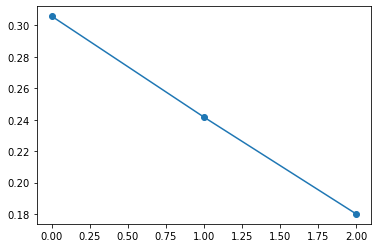

In [63]:
# Put your code here
plt.plot(pca.explained_variance_ratio_, marker="o")

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## Assignment wrap-up¶
Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!**

In [38]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofa-byNJHa0xBs0jOGcRl02lURU83U0ZHUUpWUUFRUzhCQ0JZWDQxVVRUVi4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework #5, and upload your notebook.